In [48]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [99]:
train_mnist = datasets.MNIST(r'C:\Users\777\PycharmProjects\uchuneyronki\PATH_TO_STORE_TESTSET\MNIST', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))
test_mnist = datasets.MNIST(r'C:\Users\777\PycharmProjects\uchuneyronki\PATH_TO_STORE_TESTSET\MNIST', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

# Параметры обучения FCN MLP

In [100]:
num_epochs = 10
batch_size = 32
learning_rate = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [50]:
train_dataloader = DataLoader(train_mnist, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_mnist, batch_size=batch_size, shuffle=False)

In [11]:
for data in train_dataloader:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

Батч из 32ух пар тензоров, где в первые-яркости пикселей, а вторые- метки

In [18]:
print('Количество картинок в обучающей выборке:', sum([1 for data in train_mnist]))
print('Количество картинок в тестовой выборке:', sum([1 for data in test_mnist]))

Количество картинок в обучающей выборке: 60000
Количество картинок в тестовой выборке: 10000


In [19]:
X, y = data[0][0], data[1][0]

In [20]:
print(X, y)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Text(0.5, 1.0, 'tensor(8)')

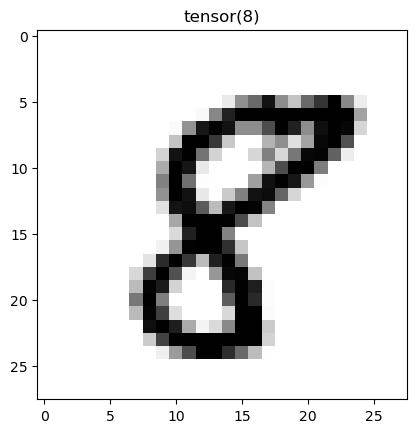

In [24]:
plt.imshow(X.view(28, 28), cmap='gray_r')
plt.title(y)

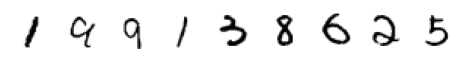

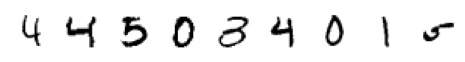

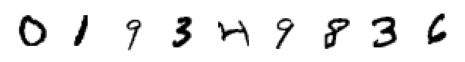

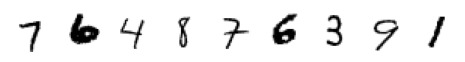

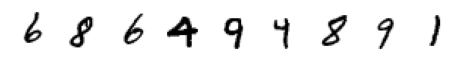

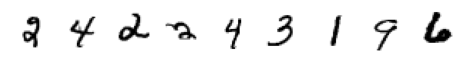

In [26]:
for _ in range(6):
    images, labels = next(iter(train_dataloader))
    figure = plt.figure()
    for index in range(1, 10):
        plt.subplot(1, 10, index)
        plt.axis('off')
        plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Процентоное соотношение цифры 0 от общего кол-ва цифр: 9.871666666666666%
Процентоное соотношение цифры 1 от общего кол-ва цифр: 11.236666666666666%
Процентоное соотношение цифры 2 от общего кол-ва цифр: 9.93%
Процентоное соотношение цифры 3 от общего кол-ва цифр: 10.218333333333334%
Процентоное соотношение цифры 4 от общего кол-ва цифр: 9.736666666666666%
Процентоное соотношение цифры 5 от общего кол-ва цифр: 9.035%
Процентоное соотношение цифры 6 от общего кол-ва цифр: 9.863333333333333%
Процентоное соотношение цифры 7 от общего кол-ва цифр: 10.441666666666666%
Процентоное соотношение цифры 8 от общего кол-ва цифр: 9.751666666666667%
Процентоное соотношение цифры 9 от общего кол-ва цифр: 9.915%


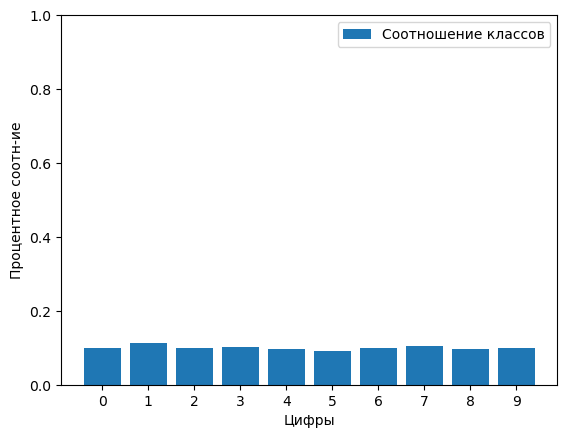

In [28]:
total = 0
dic_count = {int(i): 0 for i in range(10)}
for dat in train_dataloader:
    tens, mark = dat
    for y in mark:
        dic_count[int(y)] += 1
        total += 1
print(dic_count)
for k, v in dic_count.items():
    print(f'Процентоное соотношение цифры {k} от общего кол-ва цифр: {v*100/total}%')
keys = dic_count.keys()
vals = dic_count.values()
plt.bar(keys, np.divide(list(vals), sum(vals)), label="Соотношение классов")
plt.ylim(0,1)
plt.ylabel("Процентное соотн-ие")
plt.xlabel("Цифры")
plt.xticks(list(keys))
plt.legend()
plt.show()

Так как набор данных предварительно обработан, то наблюдаем сбалансированность данных, следовательно прибегать к дополнительным методам не придется

In [101]:
class NeuralNetwork(nn.Module):
    def __init__(self, activation=nn.ReLU()):
        super().__init__()
        self.flatten = nn.Flatten()
        self.activation = activation
        self.layers_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            self.activation,
            nn.Linear(512, 256),
            self.activation,
            nn.Linear(256, 128),
            self.activation,
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers_stack(x)
        return logits

In [102]:
model = NeuralNetwork().to(device)

In [53]:
from torchvision import models
from torchsummary import summary
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
              ReLU-4                  [-1, 512]               0
            Linear-5                  [-1, 256]         131,328
              ReLU-6                  [-1, 256]               0
              ReLU-7                  [-1, 256]               0
            Linear-8                  [-1, 128]          32,896
              ReLU-9                  [-1, 128]               0
             ReLU-10                  [-1, 128]               0
           Linear-11                   [-1, 10]           1,290
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

Архитектура ИНС имеет следующий вид: 784 входа, которые равны количеству пикселей в изображении, 3 скрытых слоя по 512, 256 и 128 нейронов соответственно. В качестве функции активации используется ReLU, которая имеет вид
![image](ReLUpic.jpg)
Всего в модели 567434 рассчитываемых параметров

In [103]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [104]:
def train_loop(dataloader, model, loss_function, optimizer):
    num_batches = len(dataloader)

    train_loss = 0

    for imgs, labels in dataloader:
        # предсказание и расчет потерь
        pred = model(imgs.to(device))
        loss = loss_function(pred, labels.to(device))

        # оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= num_batches
    print(f"Потери обучения: {train_loss:>8f}")

    return train_loss


def test_loop(dataloader, model, loss_function):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    test_loss, correct = 0, 0

    with torch.no_grad():
        for imgs, labels in dataloader:
            # Compute prediction and loss
            pred = model(imgs.to(device))
            loss = loss_function(pred, labels.to(device))

            test_loss += loss.item()
            correct += (
                (pred.argmax(1) == labels.to(device)).type(torch.float).sum().item()
            )

    test_loss /= num_batches
    correct /= size
    print(f"Потери на тестовых данных: {test_loss:>8f}, Точность модели на тестовых данных: {(100*correct):>0.1f}% \n")

    return test_loss

In [95]:
# обучение модели и построение графика обучения
loss_history = {"train": [], "test": []}
start_time = time.time()
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 2.299356
Потери на тестовых данных: 2.293170, Точность модели на тестовых данных: 12.3% 

Эпоха номер 2
Потери обучения: 2.286282
Потери на тестовых данных: 2.276639, Точность модели на тестовых данных: 20.9% 

Эпоха номер 3
Потери обучения: 2.264115
Потери на тестовых данных: 2.245855, Точность модели на тестовых данных: 44.0% 

Эпоха номер 4
Потери обучения: 2.217779
Потери на тестовых данных: 2.174506, Точность модели на тестовых данных: 49.1% 

Эпоха номер 5
Потери обучения: 2.094292
Потери на тестовых данных: 1.971794, Точность модели на тестовых данных: 49.9% 

Эпоха номер 6
Потери обучения: 1.771122
Потери на тестовых данных: 1.507152, Точность модели на тестовых данных: 59.1% 

Эпоха номер 7
Потери обучения: 1.265876
Потери на тестовых данных: 1.034491, Точность модели на тестовых данных: 73.0% 

Эпоха номер 8
Потери обучения: 0.918453
Потери на тестовых данных: 0.791925, Точность модели на тестовых данных: 77.7% 

Эпоха номер 9
Потери обучения: 0

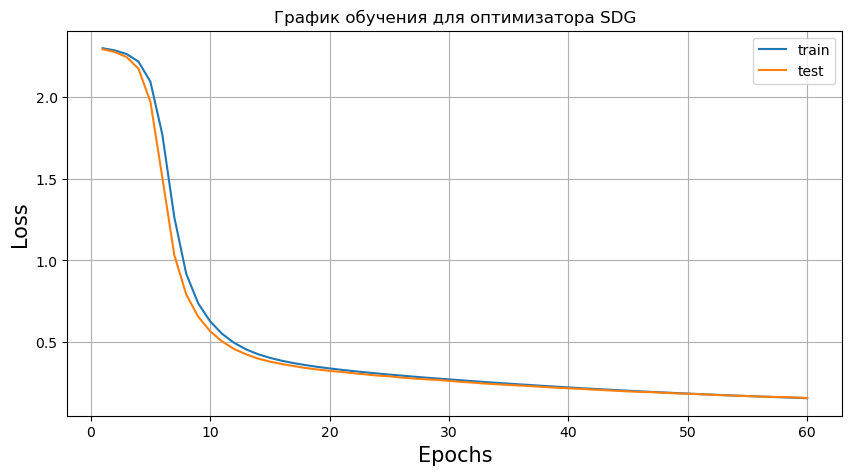

In [96]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.legend()
plt.grid()
plt.title("График обучения для оптимизатора SDG")
plt.show()

In [105]:
loss_history = {"train": [], "test": []}
start_time = time.time()
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 0.229833
Потери на тестовых данных: 0.100446, Точность модели на тестовых данных: 96.9% 

Эпоха номер 2
Потери обучения: 0.092155
Потери на тестовых данных: 0.093835, Точность модели на тестовых данных: 97.2% 

Эпоха номер 3
Потери обучения: 0.064779
Потери на тестовых данных: 0.082587, Точность модели на тестовых данных: 97.5% 

Эпоха номер 4
Потери обучения: 0.049180
Потери на тестовых данных: 0.075113, Точность модели на тестовых данных: 97.9% 

Эпоха номер 5
Потери обучения: 0.040104
Потери на тестовых данных: 0.094765, Точность модели на тестовых данных: 97.5% 

Эпоха номер 6
Потери обучения: 0.034530
Потери на тестовых данных: 0.077309, Точность модели на тестовых данных: 98.0% 

Эпоха номер 7
Потери обучения: 0.028269
Потери на тестовых данных: 0.080712, Точность модели на тестовых данных: 98.0% 

Эпоха номер 8
Потери обучения: 0.024418
Потери на тестовых данных: 0.078363, Точность модели на тестовых данных: 98.2% 

Эпоха номер 9
Потери обучения: 0

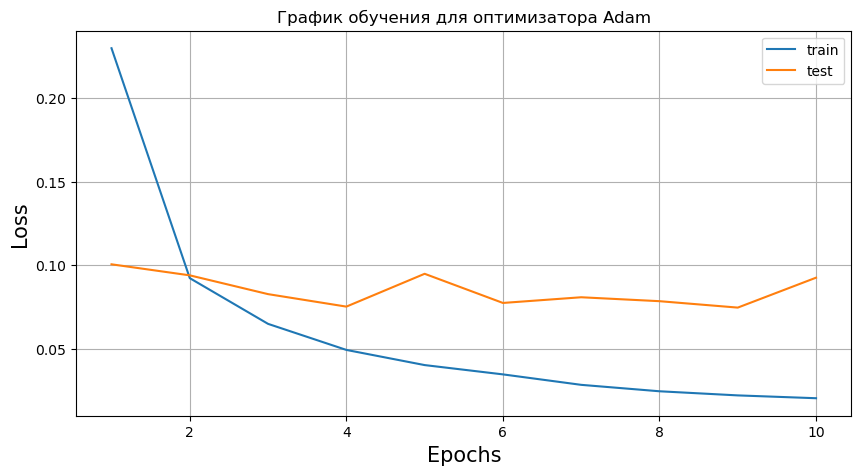

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.legend()
plt.grid()
plt.title("График обучения для оптимизатора Adam")
plt.show()

Используя оптимизатор Adam модель обучается быстрее и требует меньших вычислительных мощностей. В обоих случаях точность модели очень высокая.

In [109]:
imgs, labels = next(iter(test_dataloader))
pred = model(imgs.to(device))
imgs = torch.reshape(imgs, (32, 28, 28))
imgs = imgs[:10]
pred = pred[:10].detach()
print("Предсказание для первого образца:\n", pred[0])
digits = np.argmax(pred.cpu().numpy(), axis=1)
print("Предсказанный класс: ", digits[0])

Предсказание для первого образца:
 tensor([-36.0733,  -6.2070, -10.5537,  -9.9646,  -3.9839, -18.8594, -40.1371,
         17.7274, -16.1471, -10.9591], device='cuda:0')
Предсказанный класс:  7


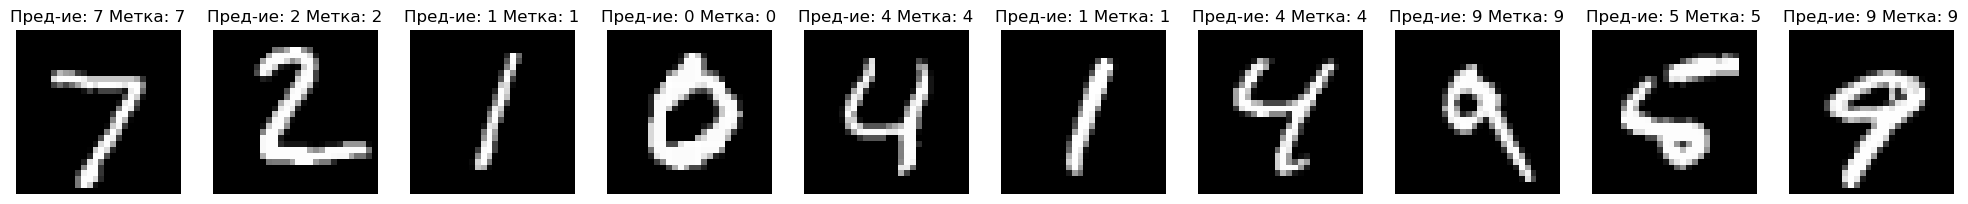

In [113]:
plt.figure(figsize=(25.0, 25.0))
for i in range(10):
    img = imgs[i]

    plt.subplot(1, 10, i + 1)
    plt.title(
        "Пред-ие: " + str(digits[i]) + " Метка: " + str(labels[i].numpy())
    )  # predicted and real values
    plt.axis("off")
    plt.imshow(img.numpy(), cmap="gray")

In [123]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import f1_score

In [136]:
net = model.to('cpu')
y_pred = []
y_true = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        X, y = data
        output = net(X.view(-1, 784))
        y_true += y.tolist()
        y_pred += torch.argmax(output, dim=1).tolist()
        for idx, i in enumerate(output):
             if torch.argmax(i) == y[idx]:
                 correct += 1
             total += 1
print(f'Accuracy: {accuracy_score(y_true, y_pred)*100}%')
print(f'Precision score: {round(precision_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'Recall score: {round(recall_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'f1 score: {round(f1_score(y_true, y_pred, average="macro")*100, 2)}%')

Accuracy: 98.04%
Precision score: 98.03%
Recall score: 98.03%
f1 score: 98.02%


Наблюдаем очень хорошие показатели точности для обученной модели.

# Сверточная сеть для MNIST

In [164]:
num_epochs = 5
batch_size = 32
learning_rate = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [165]:
class CNN_model(nn.Module):
    def __init__(self):
        super(CNN_model, self).__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),  # in channel=1, out=32
            nn.MaxPool2d(2),  # size [32,14,14]
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1),  # in channel=32, out=32
            nn.MaxPool2d(2),  # size [32,7,7]
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 100),  # in = channel*heght*width
            nn.ReLU(),
            nn.Linear(100, 10),
        )

    def forward(self, x):
        x = self.conv_stack(x)
        return x

In [192]:
model = CNN_model().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [167]:
print(model)

CNN_model(
  (conv_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1568, out_features=100, bias=True)
    (8): ReLU()
    (9): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [168]:
def train_loop(dataloader, model, loss_function, optimizer):
    num_batches = len(dataloader)

    train_loss = 0

    for imgs, labels in dataloader:
        # предсказание и расчет потерь
        pred = model(imgs.to(device))
        loss = loss_function(pred, labels.to(device))

        # оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= num_batches
    print(f"Потери обучения: {train_loss:>8f}")

    return train_loss


def test_loop(dataloader, model, loss_function):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    test_loss, correct = 0, 0

    with torch.no_grad():
        for imgs, labels in dataloader:
            # Compute prediction and loss
            pred = model(imgs.to(device))
            loss = loss_function(pred, labels.to(device))

            test_loss += loss.item()
            correct += (
                (pred.argmax(1) == labels.to(device)).type(torch.float).sum().item()
            )

    test_loss /= num_batches
    correct /= size
    print(f"Потери на тестовых данных: {test_loss:>8f}, Точность модели на тестовых данных: {(100*correct):>0.1f}% \n")

    return test_loss

In [162]:
loss_history = {"train": [], "test": []}
start_time = time.time()
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 0.165581
Потери на тестовых данных: 0.051033, Точность модели на тестовых данных: 98.4% 

Эпоха номер 2
Потери обучения: 0.050314
Потери на тестовых данных: 0.046146, Точность модели на тестовых данных: 98.4% 

Эпоха номер 3
Потери обучения: 0.036065
Потери на тестовых данных: 0.036191, Точность модели на тестовых данных: 98.8% 

Эпоха номер 4
Потери обучения: 0.026327
Потери на тестовых данных: 0.028632, Точность модели на тестовых данных: 99.0% 

Эпоха номер 5
Потери обучения: 0.020570
Потери на тестовых данных: 0.029090, Точность модели на тестовых данных: 99.0% 

Эпоха номер 6
Потери обучения: 0.016089
Потери на тестовых данных: 0.025978, Точность модели на тестовых данных: 99.2% 

Эпоха номер 7
Потери обучения: 0.013247
Потери на тестовых данных: 0.034300, Точность модели на тестовых данных: 98.9% 

Эпоха номер 8
Потери обучения: 0.011506
Потери на тестовых данных: 0.038409, Точность модели на тестовых данных: 98.9% 

Эпоха номер 9
Потери обучения: 0

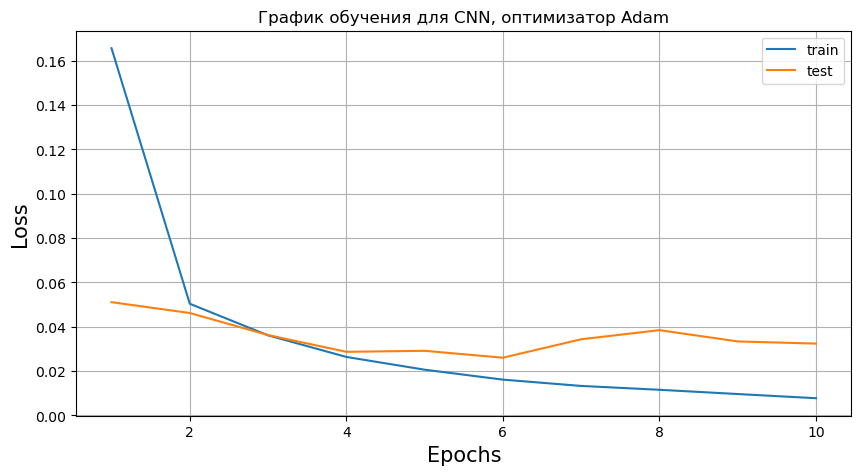

In [163]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.legend()
plt.grid()
plt.title("График обучения для CNN, оптимизатор Adam")
plt.show()

In [169]:
loss_history = {"train": [], "test": []}
start_time = time.time()
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 0.158288
Потери на тестовых данных: 0.042604, Точность модели на тестовых данных: 98.7% 

Эпоха номер 2
Потери обучения: 0.047731
Потери на тестовых данных: 0.043324, Точность модели на тестовых данных: 98.7% 

Эпоха номер 3
Потери обучения: 0.034067
Потери на тестовых данных: 0.034374, Точность модели на тестовых данных: 98.9% 

Эпоха номер 4
Потери обучения: 0.025090
Потери на тестовых данных: 0.027512, Точность модели на тестовых данных: 99.1% 

Эпоха номер 5
Потери обучения: 0.018507
Потери на тестовых данных: 0.039170, Точность модели на тестовых данных: 98.7% 

Обучение завершнео за 5 эпох, затраченное время: 33.059 секунд


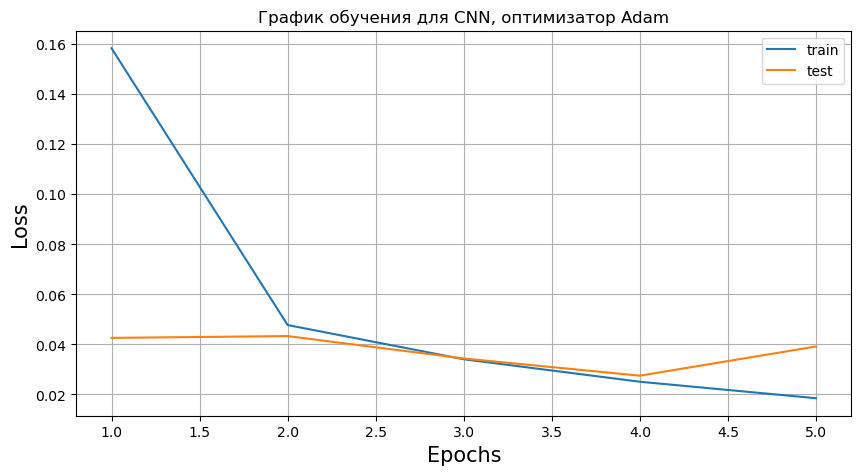

In [170]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.legend()
plt.grid()
plt.title("График обучения для CNN, оптимизатор Adam")
plt.show()

In [179]:
imgs, labels = next(iter(test_dataloader))
pred = model(imgs.to(device))
imgs = torch.reshape(imgs, (32, 28, 28))
imgs = imgs[:10]
pred = pred[:10].detach()
print("Предсказание для первого образца:\n", pred[0])
digits = np.argmax(pred.cpu().numpy(), axis=1)
print("Предсказанный класс: ", digits[0])

Предсказание для первого образца:
 tensor([-12.2671,  -3.2641,  -7.1787,  -0.6766,  -5.0645,  -8.5421, -22.2273,
         14.9186,  -7.5194,  -0.5750], device='cuda:0')
Предсказанный класс:  7


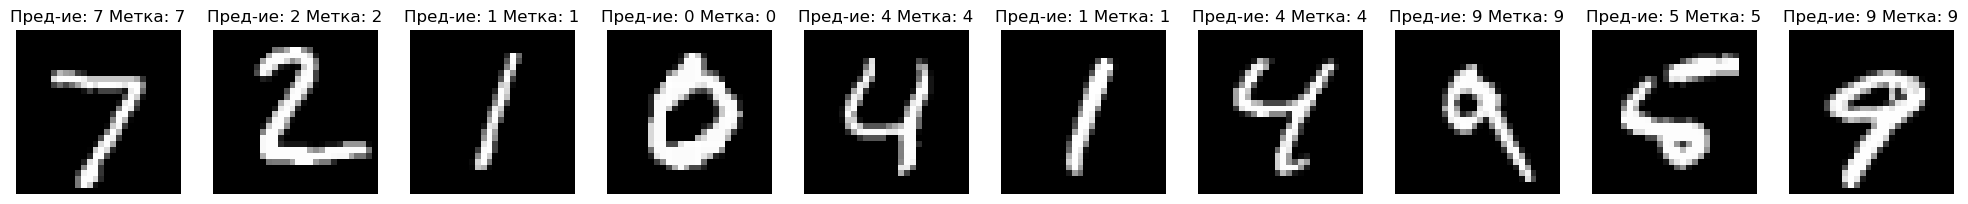

In [180]:
plt.figure(figsize=(25.0, 25.0))
for i in range(10):
    img = imgs[i]

    plt.subplot(1, 10, i + 1)
    plt.title(
        "Пред-ие: " + str(digits[i]) + " Метка: " + str(labels[i].numpy())
    )  # predicted and real values
    plt.axis("off")
    plt.imshow(img.numpy(), cmap="gray")

In [191]:
net = model.to('cpu')
y_pred = []
y_true = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        X, y = data
        output = net(X.view(-1, 28*28))
        y_true += y.tolist()
        y_pred += torch.argmax(output, dim=1).tolist()
        for idx, i in enumerate(output):
             if torch.argmax(i) == y[idx]:
                 correct += 1
             total += 1
print(f'Accuracy: {accuracy_score(y_true, y_pred)*100}%')
print(f'Precision score: {round(precision_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'Recall score: {round(recall_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'f1 score: {round(f1_score(y_true, y_pred, average="macro")*100, 2)}%')

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [32, 784]